In [2]:
import keras

Using TensorFlow backend.


In [1]:
import tensorflow as tf
import sys
import pickle

In [2]:
from tf_smpl.batch_smpl import SMPL

In [3]:
from tf_smpl.smpl_np import SMPLModel
import numpy as np

In [4]:
betas = np.random.randn(1, 10).astype(np.float32) * 0.1
thetas = np.random.randn(1, 72).astype(np.float32) * 0.2
trans = np.zeros(3)

In [10]:
smpl = SMPLModel('./tf_smpl/models/neutral_smpl_with_cocoplus_reg.pkl')
smpl_model = SMPL('./tf_smpl/models/neutral_smpl_with_cocoplus_reg.pkl')
verts, J, R = smpl_model(betas, thetas, get_skin=True)
verts_batch = verts
verts = verts[0]
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # pylint: disable=no-member
sess = tf.Session(config=config)
tf_result = sess.run(verts)
smpl.set_params(beta=betas[0], pose=thetas[0], trans=trans)
np_res = smpl.verts

In [9]:
verts_batch

<tf.Tensor 'smpl_main_1/strided_slice_4:0' shape=(1, 6890, 3) dtype=float32>

In [28]:
np.sum(tf_result-np_res)

1.0610324253467916e-05

In [51]:
model_path = './base_model.pkl'
with open(model_path, 'rb') as f:
    if sys.version_info.major == 3:
        params = pickle.load(f,encoding="latin1")
    else:
        params = pickle.load(f)

In [54]:
for key in params:
    if hasattr(params[key],'shape'):
        print(key,params[key].shape)
    else:
        print(key)

J_regressor_prior (24, 6890)
f (13776, 3)
J_regressor (24, 6890)
kintree_table (2, 24)
J (24, 3)
weights_prior (6890, 24)
weights (6890, 24)
vert_sym_idxs (6890,)
posedirs (6890, 3, 207)
pose_training_info
bs_style
v_template (6890, 3)
shapedirs (6890, 3, 10)
bs_type


In [5]:
heatmap_input = keras.Input(shape = (None,None,3),name='bodyseg_input',dtype='float32')
mask_input = keras.Input(shape = (None,None,3),name='mask_input',dtype='float32')

In [48]:
pC1 = keras.layers.Conv2D(32,(3,3),activation='relu',name='pC1',padding='same')(heatmap_input)
pP1 = keras.layers.AveragePooling2D(name='pP1')(pC1)
pC2 = keras.layers.Conv2D(64,(3,3),activation='relu',name='pC2',padding='same')(pP1)
pP2 = keras.layers.AveragePooling2D(name='pP2')(pC2)
pC3 = keras.layers.Conv2D(128,(3,3),activation='relu',name='pC3',padding='same')(pP2)
pP3 = keras.layers.GlobalAveragePooling2D(name='pP3')(pC3)
pose = keras.layers.Dense(72,activation='softmax',name='pose')(pP3)

In [49]:
sC1 = keras.layers.Conv2D(32,(3,3),activation='relu',name='sC1',padding='same')(mask_input)
sP1 = keras.layers.AveragePooling2D(name='sP1')(sC1)
sC2 = keras.layers.Conv2D(64,(3,3),activation='relu',name='sC2',padding='same')(sP1)
sP2 = keras.layers.AveragePooling2D(name='sP2')(sC2)
sC3 = keras.layers.Conv2D(128,(3,3),activation='relu',name='sC3',padding='same')(sP2)
sP3 = keras.layers.GlobalAveragePooling2D(name='sP3')(sC3)
shape = keras.layers.Dense(10,activation='softmax',name='shape')(sP3)

In [54]:
pose = pose[0,:]

In [55]:
shape = shape[0,:]

In [56]:
trans = keras.backend.zeros((3),dtype='float32')

In [57]:
v = smpl_model('./base_model.pkl',shape,pose,trans)

In [58]:
v

(<tf.Tensor 'add_8:0' shape=(6890, 3) dtype=float32>,
 array([[   1,    2,    0],
        [   0,    2,    3],
        [   2,    1,    4],
        ...,
        [4805, 3511, 6309],
        [3511, 1330, 6309],
        [6309, 1330, 4687]], dtype=uint32))

In [4]:
from smpl_np import SMPLModel
import numpy as np

In [5]:
smpl = SMPLModel('./base_model.pkl')
np.random.seed(9608)
pose = (np.random.rand(*smpl.pose_shape) - 0.5) * 0.4
beta = (np.random.rand(*smpl.beta_shape) - 0.5) * 0.06
trans = np.zeros(smpl.trans_shape)
smpl.set_params(beta=beta, pose=pose, trans=trans)
smpl.verts

array([[ 0.13425701,  0.49509287,  0.05551913],
       [ 0.12272677,  0.48581202,  0.06399115],
       [ 0.13272174,  0.47669251,  0.05796842],
       ...,
       [ 0.01916232,  0.46204396, -0.05994701],
       [ 0.01837908,  0.46368443, -0.05809687],
       [ 0.01503392,  0.46321147, -0.05608912]])

In [43]:
import tensorflow as tf
from dataset import TFRecordDataset

In [44]:
file = '../dataset/SURREAL_tfrecord/sample/val/1.tfrecords'

In [45]:
dataset = TFRecordDataset(file)
print(dataset.total_num)

TypeError: Expected int64, got '' of type 'str' instead.

In [4]:
# it_init = dataset.make_initializable_iterator()
it_one = dataset.make_one_shot_iterator()

In [5]:
# next_data = it.get_next()
one_data = it_one.get_next()

In [6]:
with tf.Session() as sess:
#     sess.run(it_init.initializer)
#     sess.run(it_one.initializer)
#     res = sess.run(next_data)
    ont_res = sess.run(one_data)

In [7]:
type(ont_res)

bytes

In [8]:
print(ont_res)

b'\n\xfc\xbc\x18\n;\n\x0blabel/shape\x12,\x12*\n(J\xe9\xa6\xbf$m\x12\xbf\x8f\x9a\xe6\xbcZ&\xc8=M\xa5\xbe=\xebe\xd7\xbf\x1c\x82\xb4?\xf0\t\xd0?W\xf1[?[\xa9\x83?\n\x9b\xd8\x04\n\rimage/bodyseg\x12\x88\xd8\x04\n\x84\xd8\x04\n\x80\xd8\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [9]:
def parse_example_proto(example_serialized,config):
        feature_map = {
            'image': tf.FixedLenFeature([], dtype=tf.string, default_value=''),
            'image/h': tf.FixedLenFeature([], dtype=tf.int64),
            'image/w': tf.FixedLenFeature([], dtype=tf.int64),
            'image/bodyseg': tf.FixedLenFeature([], dtype=tf.string, default_value=''),
            'image/bodyseg/h': tf.FixedLenFeature([], dtype=tf.int64),
            'image/bodyseg/w': tf.FixedLenFeature([], dtype=tf.int64),
            'image/human': tf.FixedLenFeature([], dtype=tf.string, default_value=''),
            'image/human/h': tf.FixedLenFeature([], dtype=tf.int64),
            'image/human/w': tf.FixedLenFeature([], dtype=tf.int64),
            'image/mask': tf.FixedLenFeature([], dtype=tf.string, default_value=''),
            'image/mask/h': tf.FixedLenFeature([], dtype=tf.int64),
            'image/mask/w': tf.FixedLenFeature([], dtype=tf.int64),
            'image/ori_mask': tf.FixedLenFeature([], dtype=tf.string),
            'image/ori_mask/h': tf.FixedLenFeature([], dtype=tf.int64),
            'image/ori_mask/w': tf.FixedLenFeature([], dtype=tf.int64),
            'label/pose': tf.FixedLenFeature((72,), dtype=tf.float32),
            'label/shape': tf.FixedLenFeature((10,), dtype=tf.float32),
#             'label/gt2d': tf.FixedLenFeature((24 * 2,), dtype=tf.float32),
#             'label/gt3d': tf.FixedLenFeature((24 * 3,), dtype=tf.float32),
        }

        features = tf.parse_single_example(example_serialized, feature_map)
        if 'ori' == config.param['IMAGE_TYPE']:
            key_str = 'image'
        if 'body' == config.param['IMAGE_TYPE']:
            key_str = 'image/bodyseg'
        if 'human' == config.param['IMAGE_TYPE']:
            key_str = 'image/human'
        if 'mask' == config.param['IMAGE_TYPE']:
            key_str = 'image/mask'
        if 'mask-body' == config.param['IMAGE_TYPE']:
            key_str = 'image/ori_mask'
        image = tf.image.decode_image(features[key_str])
#         image = tf.decode_raw(features[key_str],tf.uint8)
        h = tf.cast(features[key_str + '/h'], dtype=tf.int64)
        w = tf.cast(features[key_str + '/w'], dtype=tf.int64)
        image = tf.reshape(image, [h, w, 3])
        pose = tf.cast(features['label/pose'], dtype=tf.float32)
        shape = tf.cast(features['label/shape'], dtype=tf.float32)
        trans = np.zeros(3)
        trans = tf.constant(trans, dtype=tf.float32)
        verts_ori = smpl_model('./tf_smpl/models/neutral_smpl_with_cocoplus_reg.pkl',shape,pose,trans)
        verts = tf.reshape(verts_ori,shape=(-1,))
#         gt2d = tf.reshape(tf.cast(features['label/gt2d'], dtype=tf.float16), [24, 2])
#         gt3d = tf.reshape(tf.cast(features['label/gt3d'], dtype=tf.float16), [24, 3])
#         return image,pose,shape,verts
        print(image.shape,pose.shape,shape.shape,verts.shape)
        if config.param['MODEL_NAME'] == 'ip_sv':
            return ({"image":image,"pose":pose},{"shape":shape,"verts":verts})
        if config.param['MODEL_NAME'] == 'i_spv':
            return ({"image":image},{"shape":shape,"pose":pose,"verts":verts})

In [10]:
import tensorflow as tf
import numpy as np
from config import Config
from tf_smpl.smpl_tf import smpl_model
import matplotlib.pyplot as plt

In [11]:
file = '../dataset/SURREAL_tfrecord/sample/val/1.tfrecords'

In [12]:
dataset = tf.data.TFRecordDataset(file)

In [13]:
dataset = dataset.map(lambda x: parse_example_proto(x,Config()))

(?, ?, 3) (72,) (10,) (20670,)


In [14]:
dataset = dataset.batch(10)
dataset = dataset.repeat()

In [15]:
it_one = dataset.make_one_shot_iterator()
one_data = it_one.get_next()

In [16]:
with tf.Session() as sess:
#     sess.run(it_init.initializer)
#     sess.run(it_one.initializer)
#     res = sess.run(next_data)
    one_res = sess.run(one_data)

InvalidArgumentError: Input to reshape is a tensor with 11988 values, but the requested shape has 230400
	 [[{{node Reshape}} = Reshape[T=DT_UINT8, Tshape=DT_INT32](DecodePng, Reshape/shape)]]
	 [[node IteratorGetNext_1 (defined at <ipython-input-15-018a7ca864a5>:2)  = IteratorGetNext[output_shapes=[[?,?,?,3], [?,72], [?,10], [?,20670]], output_types=[DT_UINT8, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_1)]]

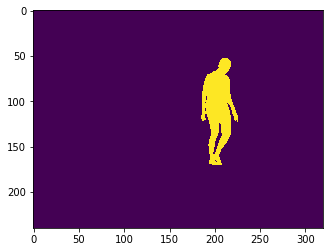

In [34]:
plt.imshow(one_res[0]['image'][3][:,:,2])
plt.show()

In [17]:
len(one_res[0])

2

In [53]:
one_res[1]['verts'].shape

(10, 20670)

In [1]:
import tensorflow as tf

In [8]:
im_tensor = tf.image.decode_image(open('../dataset/abiao/abiao00001.png','rb').read())

In [9]:
with tf.Session() as sess:
    im = sess.run(im_tensor)

In [10]:
im.shape

(960, 544, 3)

In [39]:
a = np.array((1,2,3),dtype=np.uint8)

In [40]:
a_raw = a.tostring()

In [41]:
b = np.frombuffer(a_raw,dtype=np.uint8)

In [42]:
b

array([1, 2, 3], dtype=uint8)